In [23]:
DATASET_NAME = "playground-series-s4e12"

In [24]:
import os
def is_kaggle_environment():
    return os.path.exists("/kaggle")
if not is_kaggle_environment():
    DATASET_PATH = f"./kaggle/input/{DATASET_NAME}"
else:
    DATASET_PATH = f"/kaggle/input/{DATASET_NAME}"

### Load Data

In [25]:
import pandas as pd
import numpy as np

In [26]:
train = pd.read_csv(f"{DATASET_PATH}/train.csv")
test = pd.read_csv(f"{DATASET_PATH}/test.csv")

### Data Exploration

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [28]:
train.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [30]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [31]:
train.head(3)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0


### Feature Extraction

In [32]:
train['Policy Start Year'] = pd.to_datetime(train['Policy Start Date']).dt.year
train['Policy Start Month'] = pd.to_datetime(train['Policy Start Date']).dt.month
train['Policy Start Day'] = pd.to_datetime(train['Policy Start Date']).dt.day
train['Policy Start dow'] = pd.to_datetime(train['Policy Start Date']).dt.dayofweek
train['y'] = np.log1p(train['Premium Amount']).astype(np.float32)

In [33]:
train

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start Year,Policy Start Month,Policy Start Day,Policy Start dow,y
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,Poor,No,Weekly,House,2869.0,2023,12,23,5,7.962067
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,Average,Yes,Monthly,House,1483.0,2023,6,12,0,7.302496
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Good,Yes,Weekly,House,567.0,2023,9,30,5,6.342122
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,Poor,Yes,Daily,Apartment,765.0,2024,6,12,2,6.641182
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Poor,Yes,Weekly,House,2022.0,2021,12,1,2,7.612337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,Poor,No,Daily,Apartment,1303.0,2023,5,3,2,7.173192
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,Poor,No,Weekly,Apartment,821.0,2022,9,10,5,6.711740
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,Good,No,Monthly,Condo,371.0,2021,5,25,1,5.918894
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,Poor,No,Daily,Apartment,596.0,2021,9,19,6,6.391917


In [34]:
test['Policy Start Year'] = pd.to_datetime(test['Policy Start Date']).dt.year
test['Policy Start Month'] = pd.to_datetime(test['Policy Start Date']).dt.month
test['Policy Start Day'] = pd.to_datetime(test['Policy Start Date']).dt.day
test['Policy Start dow'] = pd.to_datetime(test['Policy Start Date']).dt.dayofweek

In [35]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Start Year,Policy Start Month,Policy Start Day,Policy Start dow
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,...,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House,2023,6,4,6
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,...,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment,2024,4,22,0
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,...,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo,2023,4,5,2
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,...,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House,2023,10,25,2
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,...,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House,2021,11,26,4


#### Label Encode Categorical Features

In [36]:
RMV = ["id", "Policy Start Date", "Premium Amount", "y"]

In [37]:
FEATURES = [col for col in train.columns if col not in RMV]
print(f"THE {len(FEATURES)} BASIC FEATURES ARE:")
combined = pd.concat([train, test], axis=0, ignore_index=True)
CATS = []
HIGH_CARDINALITY = []
for c in FEATURES:
    ftype = "numerical"
    if combined[c].dtype=="object":
        CATS.append(c)
        combined[c] = combined[c].fillna("NAN")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        ftype = "categorical"
    if combined[c].dtype=="int64":
        combined[c] = combined[c].astype("int32")
    elif combined[c].dtype=="float64":
        combined[c] = combined[c].astype("float32")
        
    n = combined[c].nunique()
    print(f"{c} ({ftype}) with {n} unique values")
    if n>=9: 
        HIGH_CARDINALITY.append(c)

print("\nTHE FOLLOWING HAVE 9 OR MORE UNIQUE VALUES:", HIGH_CARDINALITY )

THE 22 BASIC FEATURES ARE:
Age (numerical) with 47 unique values
Gender (categorical) with 2 unique values
Annual Income (numerical) with 97540 unique values
Marital Status (categorical) with 4 unique values
Number of Dependents (numerical) with 5 unique values
Education Level (categorical) with 4 unique values
Occupation (categorical) with 4 unique values
Health Score (numerical) with 640260 unique values
Location (categorical) with 3 unique values
Policy Type (categorical) with 3 unique values
Previous Claims (numerical) with 10 unique values
Vehicle Age (numerical) with 20 unique values
Credit Score (numerical) with 550 unique values
Insurance Duration (numerical) with 9 unique values
Customer Feedback (categorical) with 4 unique values
Smoking Status (categorical) with 2 unique values
Exercise Frequency (categorical) with 4 unique values
Property Type (categorical) with 3 unique values
Policy Start Year (numerical) with 6 unique values
Policy Start Month (numerical) with 12 unique 

In [38]:
train = combined.iloc[:len(train)].copy()
test = combined.iloc[len(train):].reset_index(drop=True).copy()

### Model Building

In [39]:
from xgboost import XGBRegressor
import xgboost as xgb

print("Using XGBoost version",xgb.__version__)

Using XGBoost version 2.1.3


In [40]:
len(train), len(test)

(1200000, 800000)

In [41]:
from sklearn.model_selection import KFold
FOLDS = 20
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof = np.zeros(len(train))
pred = np.zeros(len(test))

x_test = test[FEATURES]

for i, (train_index, test_index) in enumerate(kf.split(train)):
    if i == 0:
        print(f"FOLDS: {FOLDS} TRAIN: {len(train_index)} VALID: {len(test_index)}")
    print(f"### Fold {i+1} ###")

    x_train = train[FEATURES].iloc[train_index]
    y_train = train['y'].iloc[train_index]

    x_valid = train[FEATURES].iloc[test_index]
    y_valid = train['y'].iloc[test_index]


    model = XGBRegressor(
        device="cuda",
        max_depth=8, 
        colsample_bytree=0.9, 
        subsample=0.9, 
        n_estimators=2_000, 
        learning_rate=0.01, 
        early_stopping_rounds=25,  
        eval_metric="rmse",
    )

    model.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],   
        verbose=100
    )

    # INFER OOF
    oof[test_index] = model.predict(x_valid)
    # INFER TEST
    pred += model.predict(x_test)
    
    m = np.sqrt(np.mean( (y_valid.to_numpy() - oof[test_index])**2.0 )) 
    print(f" => Fold {i+1} RMSLE = {m:.5f}")

pred /= FOLDS

FOLDS: 20 TRAIN: 1140000 VALID: 60000
### Fold 1 ###
[0]	validation_0-rmse:1.09640
[100]	validation_0-rmse:1.05818
[200]	validation_0-rmse:1.04926
[300]	validation_0-rmse:1.04716
[400]	validation_0-rmse:1.04659
[500]	validation_0-rmse:1.04641
[600]	validation_0-rmse:1.04636
[694]	validation_0-rmse:1.04631


/home/honey-trivedi/Coding/kaggle-playground-series-s4e12/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:20:48] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


 => Fold 1 RMSLE = 1.04631
### Fold 2 ###
[0]	validation_0-rmse:1.09442
[100]	validation_0-rmse:1.05701
[200]	validation_0-rmse:1.04822
[300]	validation_0-rmse:1.04607
[400]	validation_0-rmse:1.04539
[500]	validation_0-rmse:1.04522
[600]	validation_0-rmse:1.04511
[691]	validation_0-rmse:1.04507
 => Fold 2 RMSLE = 1.04506
### Fold 3 ###
[0]	validation_0-rmse:1.09813
[100]	validation_0-rmse:1.06046
[200]	validation_0-rmse:1.05169
[300]	validation_0-rmse:1.04963
[400]	validation_0-rmse:1.04896
[500]	validation_0-rmse:1.04880
[600]	validation_0-rmse:1.04867
[662]	validation_0-rmse:1.04865
 => Fold 3 RMSLE = 1.04865
### Fold 4 ###
[0]	validation_0-rmse:1.09382
[100]	validation_0-rmse:1.05581
[200]	validation_0-rmse:1.04681
[300]	validation_0-rmse:1.04461
[400]	validation_0-rmse:1.04394
[500]	validation_0-rmse:1.04378
[600]	validation_0-rmse:1.04370
[606]	validation_0-rmse:1.04370
 => Fold 4 RMSLE = 1.04370
### Fold 5 ###
[0]	validation_0-rmse:1.10023
[100]	validation_0-rmse:1.06257
[200]	va

In [42]:
m = np.sqrt(np.mean( (train.y.values - oof)**2.0 )) 
print(f"Overall CV RMSLE = {m:.5f}")

Overall CV RMSLE = 1.04530


Text(0.5, 1.0, 'XGB Top 25 Feature Importances')

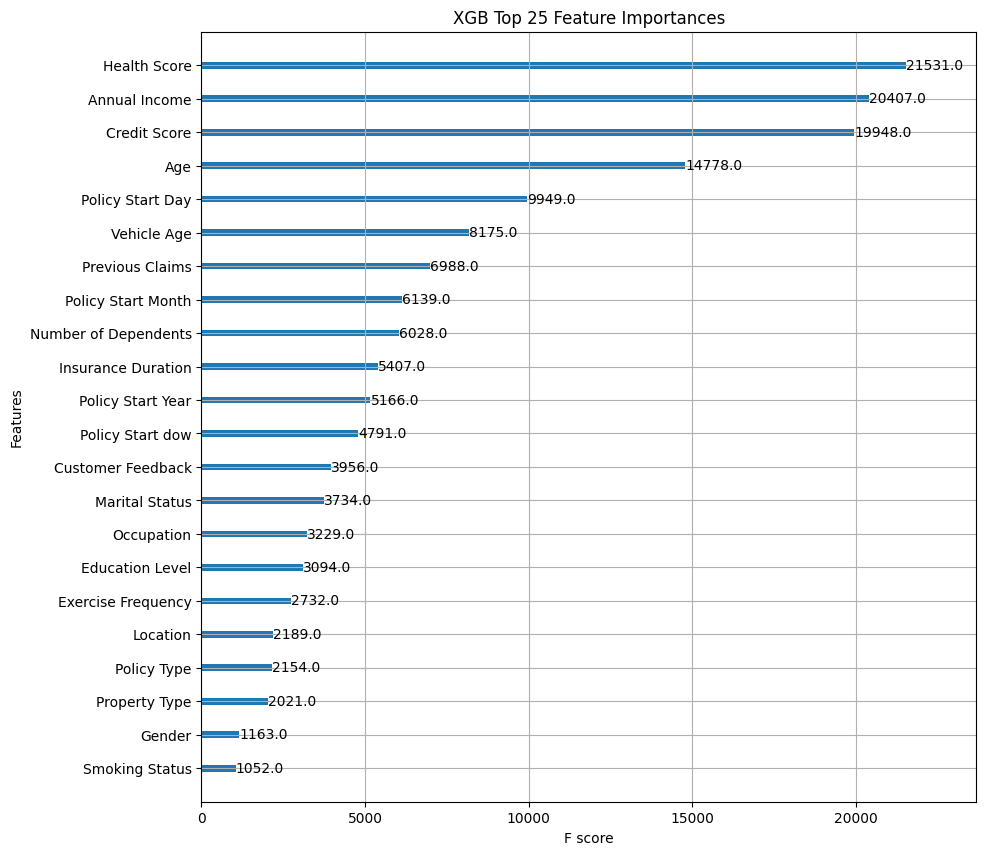

In [43]:
# Plot top 25 features by importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size if needed
xgb.plot_importance(
    model,
    ax=ax,
    max_num_features=25,  # Display only the top 25 features
    importance_type="weight",  # Options: 'weight', 'gain', 'cover', 'total_gain', 'total_cover'
)
plt.title("XGB Top 25 Feature Importances")

In [44]:
submission = test[["id", "Premium Amount"]].copy()
submission["Premium Amount"] = np.exp( pred )-1
submission.to_csv("submission.csv", index=False)
print(submission.shape)
submission.head()

(800000, 2)


,id,Premium Amount
0,1200000,800.467312
1,1200001,798.383095
2,1200002,792.269949
3,1200003,795.428303
4,1200004,749.058201
